# **Tarea 1. Minería de Texto**


In [1]:
!pip install nltk
!python -m nltk.downloader book
!python -m nltk.downloader cess_esp
!pip install pattern

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_da

1. Usando las expresiones regulares, defina una función, que reemplace un par de caracteres repetidos uno sólo de ellos.

In [2]:
import re

In [3]:
def quita_repetido(texto2):
    arreglo=re.findall(r"[A-z]", texto2)
    for a in arreglo:
        a=re.compile(r"^(\w*)(\w)\2(\w*)")
        texto2=a.sub(r'\1\2\3',texto2)
        texto2
    return texto2

In [4]:
texto="Heeeelllllloooooo"
quita_repetido(texto)

'Helo'

2. Supóngase que se analiza un texto que contiene palabras mal escritas, bien sea por otrografía incorrecta o por la repetición de algún caracter (o pares) adyacentes. En este ejercício, se debe proponer una función que permita corregir una gran cantidad de palabras mal escritas. Por ejemplo, supóngase que se desea corregir las palabras mal escritas de la frase 'This product iis awesomeeeeee'. Use la tokenización, un patrón de expresión regular (regex) de python y una sustitución mediante la librería re, para remover los caracteres repetidos de una palabra.

In [5]:
def quita_repetido2(texto2):
    cadena_total=""
    arreglo0=re.findall(r"[A-z]+", texto2)
    for b in arreglo0:
        arreglo=re.findall(r"[A-z]", b)
        texto2=b
        for c in arreglo:
            a=re.compile(r"^(\w*)(\w)\2(\w*)")
            texto2=a.sub(r'\1\2\3',texto2)
            texto2
        cadena_total=cadena_total+" "+texto2
    return cadena_total

In [6]:
mal_escrita="This product iis awesomeeeeee"
quita_repetido2(mal_escrita)

' This product is awesome'

3. La anterior función tiene un inconveniente, y es que la ortografía de algunas palabras requieren el uso de letras repetidas. Por ejemplo, considere la palabra commonly, que al ser preocesada da como resultado comonly. Mejore la función del ítem anterior verificando en cada eliminación del caracter repetido, si la palabra pertenece al corpus words.

In [7]:
from nltk.corpus import words
"commonly" in words.words()

True

In [8]:
def quita_repetido3(texto2):
    cadena_total=""
    arreglo0=re.findall(r"[A-z]+", texto2)
    for b in arreglo0:
        arreglo=re.findall(r"[A-z]", b)
        texto2=b
        for c in arreglo:
            validador= texto2 in words.words()
            if validador == True:
                break
            a=re.compile(r"^(\w*)(\w)\2(\w*)")
            texto2=a.sub(r'\1\2\3',texto2)
        cadena_total=cadena_total+" "+texto2
    return cadena_total

In [9]:
mal_escrita="This product iis awesomeeeeee"
quita_repetido2(mal_escrita)

' This product is awesome'

In [10]:
mal_escrita="commonly"
quita_repetido3(mal_escrita)

' commonly'

4. La función puede mejorar un poco. Considere el siguiente código:

In [12]:
from pattern.en import suggest
suggest('fianly')

[('finally', 0.2965779467680608),
 ('mainly', 0.14258555133079848),
 ('firmly', 0.13878326996197718),
 ('final', 0.12547528517110265),
 ('fancy', 0.09505703422053231),
 ('fairly', 0.04752851711026616),
 ('frankly', 0.043726235741444866),
 ('vainly', 0.03802281368821293),
 ('manly', 0.024714828897338403),
 ('finely', 0.02091254752851711),
 ('faintly', 0.011406844106463879),
 ('meanly', 0.005703422053231939),
 ('flatly', 0.0038022813688212928),
 ('fiance', 0.0038022813688212928),
 ('fanny', 0.0019011406844106464)]

In [23]:
validador_dicc=suggest('awesomeeeeee')
validador_dicc[0][1]

0.0

In [19]:
def quita_repetido4(texto2):
    cadena_total=""
    arreglo0=re.findall(r"[A-z]+", texto2)
    for b in arreglo0:
        arreglo=re.findall(r"[A-z]", b)
        texto2=b
        for c in arreglo:
            validador= suggest(texto2)
            if validador_dicc[0][1] == 1.0:
                break
            a=re.compile(r"^(\w*)(\w)\2(\w*)")
            texto2=a.sub(r'\1\2\3',texto2)
        cadena_total=cadena_total+" "+texto2
    return cadena_total

In [20]:
mal_escrita="commonly"
quita_repetido4(mal_escrita)

' commonly'

In [24]:
mal_escrita="This product iis awesomeeeeee"
quita_repetido4(mal_escrita)

' This product is awesome'

5. Realice un análisis similiar al realizado en la clase 1 añadiendo la función de corrección de palabras con el dataset adjunto, que contiene reseñas de catas de vinos.

In [66]:
from nltk.corpus import gutenberg
from nltk.util import ngrams # Esta función devuelve devuelve la lista de n-gramas de un texto tokenizado

In [39]:
with open("/content/winemag-data-130k-v2.csv") as f:
  vinos = f.read()

**1. Tokenización:**

In [56]:
from nltk import word_tokenize # Tokenización de un texto por palabras. 
word_tokenize(vinos)

[',',
 'country',
 ',',
 'description',
 ',',
 'designation',
 ',',
 'points',
 ',',
 'price',
 ',',
 'province',
 ',',
 'region_1',
 ',',
 'region_2',
 ',',
 'taster_name',
 ',',
 'taster_twitter_handle',
 ',',
 'title',
 ',',
 'variety',
 ',',
 'winery',
 '0',
 ',',
 'Italy',
 ',',
 "''",
 'Aromas',
 'include',
 'tropical',
 'fruit',
 ',',
 'broom',
 ',',
 'brimstone',
 'and',
 'dried',
 'herb',
 '.',
 'The',
 'palate',
 'is',
 "n't",
 'overly',
 'expressive',
 ',',
 'offering',
 'unripened',
 'apple',
 ',',
 'citrus',
 'and',
 'dried',
 'sage',
 'alongside',
 'brisk',
 'acidity',
 '.',
 '``',
 ',',
 'Vulkà',
 'Bianco,87',
 ',',
 ',Sicily',
 '&',
 'Sardinia',
 ',',
 'Etna',
 ',',
 ',Kerin',
 'O',
 '’',
 'Keefe',
 ',',
 '@',
 'kerinokeefe',
 ',',
 'Nicosia',
 '2013',
 'Vulkà',
 'Bianco',
 '(',
 'Etna',
 ')',
 ',',
 'White',
 'Blend',
 ',',
 'Nicosia',
 '1',
 ',',
 'Portugal',
 ',',
 "''",
 'This',
 'is',
 'ripe',
 'and',
 'fruity',
 ',',
 'a',
 'wine',
 'that',
 'is',
 'smooth',
 'whi

In [59]:
default_st = nltk.sent_tokenize 
alice_sentences = default_st(text=vinos) 
sample_sentences = default_st(text=vinos)

In [61]:
print('\nTotal de oraciones en texto:', len(sample_sentences)) 
print('\nOraciones de texto:\n') 


Total de oraciones en texto: 372838

Oraciones de texto:



In [63]:
print('\nTotal de oraciones en alice:', len(alice_sentences))
print('\nPrimeras dos oraciones alice:\n') 
print(alice_sentences[:2]) 


Total de oraciones en alice: 372838

Primeras dos oraciones alice:

[',country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery\n0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb.', "The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."]


 n-gramas con nltk

In [68]:
tokens2 = word_tokenize(vinos)
trigramas=list(ngrams(tokens2,4))
print(trigramas[0:3])

[(',', 'country', ',', 'description'), ('country', ',', 'description', ','), (',', 'description', ',', 'designation')]


Eliminamos las palabras vacias

In [73]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def token_sin_palab_vac(text):
    tokens = [word.lower() for word in nltk.word_tokenize(text) if word.isalpha() and word not in stopwords]
    return tokens
vinos_sin_vac=token_sin_palab_vac(vinos)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Verificamos el origen de las palabras 

In [75]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
origen_palabras= [stemmer.stem(word) for word in vinos_sin_vac]

In [77]:
origen_palabras[0:10]

['countri',
 'descript',
 'design',
 'point',
 'price',
 'provinc',
 'titl',
 'varieti',
 'wineri',
 'itali']

**5. Lematización:** 

In [93]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
arreglo={}
conteo=0
for a in vinos_sin_vac:
    arreglo[conteo]=wnl.lemmatize(a, 'n')
    conteo=conteo+1
arreglo

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{0: 'country',
 1: 'description',
 2: 'designation',
 3: 'point',
 4: 'price',
 5: 'province',
 6: 'title',
 7: 'variety',
 8: 'winery',
 9: 'italy',
 10: 'aroma',
 11: 'include',
 12: 'tropical',
 13: 'fruit',
 14: 'broom',
 15: 'brimstone',
 16: 'dried',
 17: 'herb',
 18: 'the',
 19: 'palate',
 20: 'overly',
 21: 'expressive',
 22: 'offering',
 23: 'unripened',
 24: 'apple',
 25: 'citrus',
 26: 'dried',
 27: 'sage',
 28: 'alongside',
 29: 'brisk',
 30: 'acidity',
 31: 'vulkà',
 32: 'sardinia',
 33: 'etna',
 34: 'o',
 35: 'keefe',
 36: 'kerinokeefe',
 37: 'nicosia',
 38: 'vulkà',
 39: 'bianco',
 40: 'etna',
 41: 'white',
 42: 'blend',
 43: 'nicosia',
 44: 'portugal',
 45: 'this',
 46: 'ripe',
 47: 'fruity',
 48: 'wine',
 49: 'smooth',
 50: 'still',
 51: 'structured',
 52: 'firm',
 53: 'tannin',
 54: 'filled',
 55: 'juicy',
 56: 'red',
 57: 'berry',
 58: 'fruit',
 59: 'freshened',
 60: 'acidity',
 61: 'it',
 62: 'already',
 63: 'drinkable',
 64: 'although',
 65: 'certainly',
 66: 'bett

In [85]:
from nltk import FreqDist
fdist1 = FreqDist(vinos_sin_vac)
print([i for i in fdist1.most_common(20)])

[('wine', 85192), ('valley', 80347), ('flavors', 65048), ('the', 58763), ('red', 57537), ('us', 56630), ('california', 46771), ('fruit', 46768), ('it', 45332), ('this', 42741), ('aromas', 41165), ('blend', 40946), ('pinot', 40238), ('palate', 39625), ('sauvignon', 38723), ('acidity', 36285), ('finish', 35954), ('cabernet', 34588), ('de', 32817), ('tannins', 32075)]


Grafico de conteo

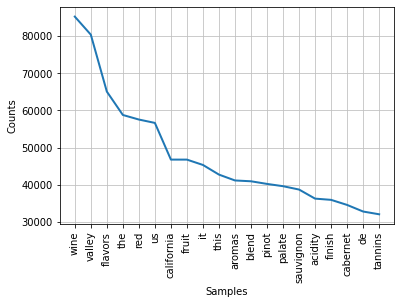

In [86]:
fdist1.plot(20)

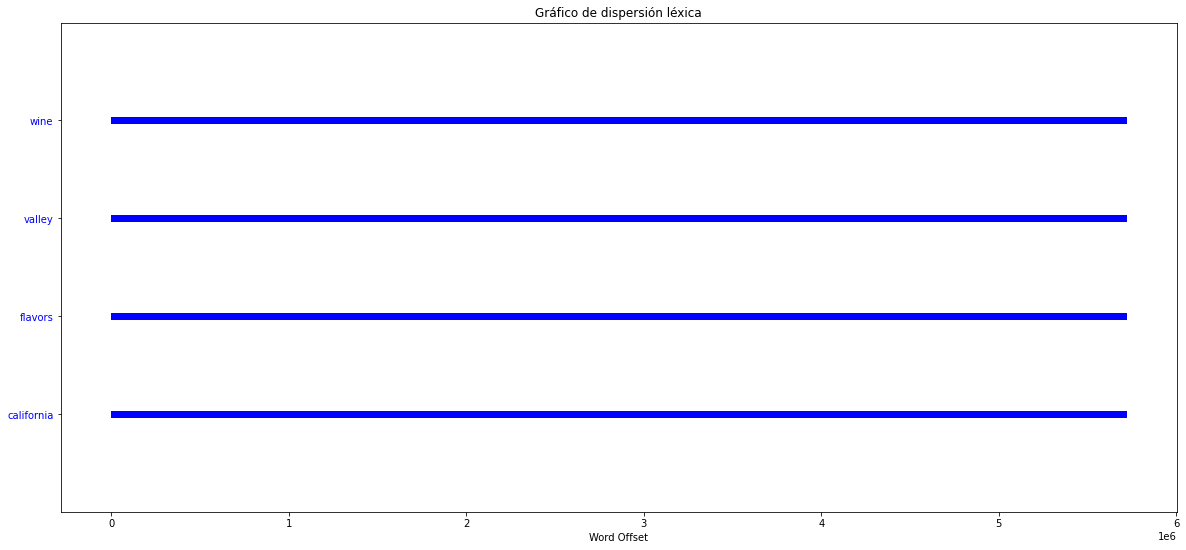

In [88]:
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt

# the following command can be used to increase the size of the plot using width and hight specifications
plt.figure(figsize=(20, 9))
targets=['wine','valley','flavors','california']
dispersion_plot(vinos_sin_vac, targets, ignore_case=True, title='Gráfico de dispersión léxica') 

Nube de palabras

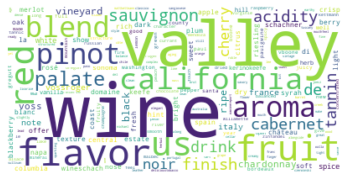

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = " ".join(vinos_sin_vac)
word_cloud = WordCloud(collocations = False,background_color = 'white').generate(text) # Se crea el objeto de nombre word_cloud
# Se indica el argumento collotations como False, porque palabras muy comunes, pueden ser detectadas como collocations
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()